# Exercises Week 10-11: Graded exercise session (part B)

**Course**: [Life Sciences engineering: genome to function](https://go.epfl.ch/BIO-411) (BIO-411)

**Professors**:  _Gönczy Pierre_, _Naef Felix_, _McCabe Brian Donal_

SSV, MA, 2025-2026

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import scipy
from scipy.stats import beta
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import math
import seaborn as sns



**Provide answers in the form of code, figures (if relevant) and short descriptions (in markdown cells) in those notebooks. Submit your notebook to Moodle, please make sure to execute every cell.  
We very strongly advise each member of the group to work on the whole notebook on their own to understand it in details, as it comes out that in the exam this subject is often poorly understood.  
The theory related to Exercise 2 Question 2 will be discussed in the lecture of 27th November.**

### Exercise 1: Simulation of cell cycle gene (RNA) expression

In this exercise, we focus on the transcription and splicing of a pre-mRNA to produce mRNA. We describe this process using a two-dimensional Ordinary Differential Equation (ODE) with **time-dependent** transcription and degradation rates to model cell cycle dynamics.

The system is defined by the following ODEs:

\begin{array}{ll}
\frac{dP}{dt} = s(t) - \rho P \\  
\\
\frac{dM}{dt} = \rho P - k(t) M \\
\end{array}

where  $P$ and $M$ represent the concentrations of pre-mRNA and mRNA, respectively. The frequency is defined by $\omega=\frac{2\pi}{T}$, taking a cell cycle period $T=20h$.  

$s(t)$ is the transcription rate, which is now taken either as constant $s(t)=s_{0}$ or as a periodic function of time:  

\begin{equation*}
s(t) = s_0(1 + \epsilon_s \cos(\omega t)) 
\end{equation*}  
with relative amplitude $0\leq \epsilon_s\leq 1$. Note that the peak of $s(t)$ is at $t=0$.  
 
Similarly, we will consider the degradation rate $k(t)$ either as constant $k(t)= k_0$ or a periodic function of time:  
\begin{equation*}
k(t)=k_0(1 + \epsilon_k \cos(\omega (t-t_k))
\end{equation*}  
with $0\leq\epsilon_k\leq 1$, and the maximum degradation rate at $t=t_k$.

$\rho$ represents the constant splicing rate of pre-mRNA $P$ into mRNA $M$.

### Question 1
1. Adapt the code from Week 9 exercises to simulate this system with periodic transcription and degradation rates. Modify the interactive widget such that you can vary the new parameters and plot $P(t)$ and $M(t)$.  

2. Keep the degradation rate constant (set $\epsilon_k$=0) and vary $k_0$ and $\epsilon_s$.
    * How does the phase delay between $M(t)$ and $P(t)$ changes with different values of $k_0$?
    * How does the amplitude (use the ratio between max and min) of $M(t)$ changes with different values of $k_0$? 
    
    Make sure you span a relevant range for $k_0^{-1}$ (*i.e.* from 10 minutes to several hours).  

3. Now introduce periodic degradation by varying $\epsilon_k$. 
    * Show that you can obtain a periodic mRNA accumulation when the synthesis is constant ($\epsilon_s=0$). 

**Since the widget results are not kept upon saving the notebook, when showing plots is necessary for your answer, please take a screenshot of the obtained results and include it in your answer, together with the values of the parameters you used to get the behaviour you want to show.**

In [2]:

def production_decay_ode(y, time, T, s_0, k_0, rho, eps_s, eps_k, t_k):

    """
    Defines the ODEs for the production and decay of pre-mRNA and mRNA.
    P: pre-mRNA concentration
    M: mRNA concentration
    T: cell cycle period
    s_0: transcription rate constant
    k_0: mRNA degradation rate constant
    rho: splicing rate
    eps_s: relative amplitude of transcription oscillation
    eps_k: relative amplitude of degradation oscillation
    t_k: phase shift of degradation oscillation
    
    """
    omega = 2 * np.pi / T 
    s = s_0*(1 + eps_s * np.cos(omega*time))
    k = k_0*(1 + eps_k * np.cos(omega*(time - t_k)))
    P, M = y
    dPdt = s - rho * P
    dMdt = rho * P - k * M
  
    return [dPdt, dMdt] 


def simulation(ode_function, parameters, initial_conditions = None, time = None):

    """
    Simulate the ODEs for the production and decay of pre-mRNA and mRNA.
    parameters: parameters for the ODEs
    initial_conditions: initial conditions for the ODEs
    time: time intervals for the simulation
    """
    T = parameters['T']
    s_0 = parameters['s_0']
    k_0 = parameters['k_0']
    rho = parameters['rho']
    eps_s = parameters['eps_s']
    eps_k = parameters['eps_k']
    t_k = parameters['t_k']
    

    
    results = odeint(ode_function, initial_conditions, time, args=(T, s_0, k_0, rho, eps_s, eps_k, t_k))

    plt.figure(figsize=(10, 6))
    plt.ylim([0,150])


    plt.title('Simulation of pre-mRNA and mRNA Production-Decay Dynamics')
    plt.plot(time, results[:, 0], label = 'P(t)', linewidth=2)
    plt.plot(time, results[:, 1], label = 'M(t)', linewidth=2)
    plt.xlabel("Time [min]")
    plt.ylabel("Concentration")
    plt.legend()


    plt.xlabel("Time [min]")
    plt.ylabel("Concentration")
    plt.legend(loc='upper left')
    plt.show()
    
def animate(initial_conditions, time, T=1200, s_0=5, k_0= 0.05, rho=0.4, eps_s=0, eps_k=0, t_k=0):
    """
    Runs the simulation with an interactive widgets for parameter exploration.
    """
      
    parameters = {'T':T,'s_0':s_0,'k_0':k_0, 'rho':rho, 'eps_s':eps_s, 'eps_k':eps_k, 't_k':t_k}
    simulation(production_decay_ode, parameters, initial_conditions, time)



In [42]:
#1.1
# Define initial conditions and time intervals for the simulation
initial_conditions = [0, 0] #[P, M]
time = np.linspace(0, 1200, 10001)





interact(animate, 
         initial_conditions=fixed(initial_conditions), 
         time=fixed(time),
         T = fixed(1200), # min
         s_0 = (1,10,0.01), #  Transcription rate units: concentration [P] per min    
         k_0 = (1/600,1/10,1/1000),  # mRNA degradation rate units: 1/min (range: 10 min to 600 min)
         rho = (1/30,1,0.05), #splicing rate units: 1/min (range: 1 min to 30 min)
         eps_s=(0, 1, 0.01),
         eps_k=(0, 1, 0.01),
         t_k=(0, 20, 0.1)); # inside first cycle T
         
         

interactive(children=(FloatSlider(value=5.0, description='s_0', max=10.0, min=1.0, step=0.01), FloatSlider(val…

1.2. When varying the constant degradation rate k_0, P doesn't change as it represents the pre-mRNA degradation and k is only used to describe mRNA degradation. However, M amplitude decreases as k_0 increases (and inversely), as a higher rate allows more mRNA to be degraded and the concentration is thus reduced. Applying this to the phase delay between M and P, with a low k_0 M responds slowly and the phase delay is larger. On the other hand, if k_0 is larger, M adjusts more quickly and the phase delay is smaller. 

![fig1](fig1.png)


1.3. Even with a constant synthesis, we can see periodic accumulation of mRNA. By increasing the time window to 2400 minutes, we have two cycles of oscillations present. With non-zero values of eps_k, we clearly see an accumulation (maximum of mRNA concentration) per cycle.

![fig2](fig2.png)

### Exercise 2: Cell cycle (post-)transcriptional regulation of gene expression in human RPE1 cells

In this exercise, we will analyze RNA-seq data from normally dividing human RPE1 cells (cell cycle period of $T=20h$).
 The provided data has two replicates and is binned into 50 equally spaced time points ($dt=0.4h=24min$). Similar to the Week 9 exercises on RNA-seq data, gene expression was quantified at the intron (i.e., unspliced) and exon (i.e., spliced) levels.
Note that the data are already normalized.
The time has been defined such that $t=0$ corresponds to the start of $G_{1}$. Assume that there is no $G_{0}$ state.

### Function definition

In [5]:

def run_PCA(data, n_components=5, color_by='replicate', symbol_by='time', scale_data=True, offset=0.1, std_div=True):
    
    """
    Runs PCA on the provided data and generates a scatter plot of pairs of principal components.
    It also returns a DataFrame containing the PCA loadings.

    Parameters:
    data: The gene expression data to analyze.
    n_components: The number of principal components to calculate.
    color_by: The metadata category to color the data points by.
    symbol_by: The metadata category to symbolize the data points by.
    scale_data: Whether to scale the data before PCA.

    Returns:
    pd.DataFrame: A DataFrame containing the PCA loadings.
    """

    data_tmp = data.copy()
    data=np.log2(data+offset).to_numpy()
    # Scale each sample of the data by mean and by standard deviation if specified
    if scale_data:
        data[:, :50]=data[:, :50]-data[:, :50].mean(1).reshape(-1, 1)
        data[:, 50:]=data[:, 50:]-data[:, 50:].mean(1).reshape(-1, 1)
        if std_div:
            data[:, :50]=data[:, :50]/data[:, :50].std(1).reshape(-1, 1)
            data[:, 50:]=data[:, 50:]/data[:, 50:].std(1).reshape(-1, 1)
    else:
        data = data

        
    # Fit the PCA model
    pca = PCA(n_components=n_components)
    pca.fit(data.T)

    # Transform the data
    pca_transformed = pca.transform(data.T)

    # Create a DataFrame for the PCA results
    labels = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(pca_transformed, columns=labels)
    pca_df[color_by] = data_tmp.columns.get_level_values(color_by)
    pca_df[symbol_by] = data_tmp.columns.get_level_values(symbol_by)

    if color_by=="time":
        pca_df[color_by]=np.round(pd.to_numeric(data_tmp.columns.get_level_values(color_by))/50 *20, 1).astype(str)
        palette='twilight'
    else:
        palette='Set1'

    # Plotting each pair of consecutive principal components
    fig, axes = plt.subplots(1, n_components -1, figsize=(30, 15))
    for i in range(n_components-1):
        sns.scatterplot(ax=axes[i], data=pca_df, x=f'PC{i+1}', y=f'PC{i+2}', 
        hue=color_by, style=symbol_by, s=200, palette=palette)

        axes[i].set_xlabel(f'PC{i+1} ({pca.explained_variance_ratio_[i]*100:.2f}%)')
        axes[i].set_ylabel(f'PC{i+2} ({pca.explained_variance_ratio_[i+1]*100:.2f}%)')
        axes[i].set_box_aspect(1) 
        # remove legend if it's not the first plot
        if i == 0:
        # Move legend outside for the first plot
            axes[i].legend(loc='upper center', bbox_to_anchor=(1.3, 1), ncol=2, title=color_by) #
        else:
        # Remove legend for all other plots
            axes[i].get_legend().remove()
    fig.suptitle(f'PCA of Gene Expression Data (color={color_by}, symbol={symbol_by})', fontsize=16)
    plt.tight_layout()
    
    # Return the PCA loadings
    df_pca = pd.DataFrame(pca.components_, columns=data_tmp.index, index=labels)

    return df_pca

def harm_reg(x, t, period):
    """
    Fit a harmonic regression model to a time series. Perform likelihood ratio test between the full and null model. Get p-value from the test.
    
    Parameters:
    x (array): Time series data
    t (array): Time points
    period (float): Period of the harmonic function

    Returns:
    tuple: Mean (mu), peak-to-through amplitude (amp), phase (phase), and p-value (p_val)

    """

    n = len(x)
    
    # Fit the null model (intercept only)
    X0 = np.ones((n, 1))  # Design matrix for the null model
    fit0 = sm.OLS(x, X0).fit()
    
    c = np.cos(2 * np.pi * t / period)
    s = np.sin(2 * np.pi * t / period)
    
    # Design matrix for the full model
    X1 = np.column_stack((np.ones(n), c, s))
    fit1 = sm.OLS(x, X1).fit()
    
    # Coefficients
    mu = fit1.params[0]
    a = fit1.params[1]
    b = fit1.params[2]
    
    # Likelihood ratio test
    lr_stat = 2 * (fit1.llf - fit0.llf)
    p_val = scipy.stats.chi2.sf(lr_stat, 2)
    
    # Amplitude and phase
    amp = 2 * np.sqrt(a**2 + b**2)
    phase = np.arctan2(b, a) % (2 * np.pi)
    phase = period * phase / (2 * np.pi)

    
    return mu, amp, phase, p_val

def fit_harmo(data, time, period):
    """
    Applies the harm_reg function to all genes for a given normalized gene expression dataset.

    Parameters:
    data (pd.DataFrame): Normalized gene expression dataset with genes as rows.
    time (array): Time points for the dataset.
    period (float): Period of the harmonic function.

    Returns:
    pd.DataFrame: A DataFrame containing the amplitude, phase, p-value, qvalue and mu for each gene.
    """
    results = data.apply(lambda x: harm_reg(x.values, time, period), axis=1)
    results_df = pd.DataFrame(results.tolist(), index=data.index, columns=['mu', 'amp', 'phase', 'p_val'])
    results_df['p_val'] = results_df['p_val'].fillna(1)
    results_df['q_val'] = multipletests(results_df['p_val'], method='fdr_bh')[1]

    return results_df


# Plotting function for side-by-side intron and exon plots
def plot_gene_expression(dat_melted, gene_name):
    """
    Plots the expression of a gene introns and exons over time.

    Parameters:
    dat_melted (pd.DataFrame): The melted gene expression dataset.
    gene_name (str): The gene to plot.

    Returns:
    None
    """

    # Filter the melted DataFrame for the gene of interest
    data = dat_melted[dat_melted['Gene_Symbol'] == gene_name]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # Create 1 row, 2 columns

    # Plot Replicate 0 Intron and Exon Expression
    sns.scatterplot(
        data=data[data['replicate'] == "0"],  # Filter directly for intron
        x='time', y='expression', hue='feature', style='feature',
        alpha=0.6, legend='full', ax=axes[0]
    )
    sns.lineplot(
        data=data[data['replicate'] == "0"],  # Filter directly for intron
        x='time', y='expression', hue='feature', estimator='mean',
        errorbar=None, legend=False, ax=axes[0]
    )
    axes[0].set_title(f"{gene_name} Introns and Exons Expression\n Over Time For Replicate 0")
    axes[0].set_xlabel("Time (hours)")
    axes[0].set_ylabel("Expression Level")
    axes[0].grid(alpha=0.3)
    axes[0].set_box_aspect(1)  # Ensure square aspect ratio
    axes[0].set_xticks(np.arange(0, 49, 5), np.linspace(0, 20, 11).astype(int)[:-1])

    # Plot Replicate 1 Intron and Exon Expression
    sns.scatterplot(
        data=data[data['replicate'] == "1"],  # Filter directly for intron
        x='time', y='expression', hue='feature', style='feature',
        alpha=0.6, legend='full', ax=axes[1]
    )
    sns.lineplot(
        data=data[data['replicate'] == "1"],  # Filter directly for intron
        x='time', y='expression', hue='feature',
        errorbar=None, legend=False, ax=axes[1]
    )
    axes[1].set_title(f"{gene_name} Introns and Exons Expression\n Over Time For Replicate 1")
    axes[1].set_xlabel("Time (hours)")
    axes[1].set_ylabel("Expression Level")
    axes[1].grid(alpha=0.3)
    axes[1].set_box_aspect(1)  # Ensure square aspect ratio
    axes[1].set_xticks(np.arange(0, 49, 5), np.linspace(0, 20, 11).astype(int)[:-1])


    plt.show()

def best_subplot_shape(n_Genes):
    n_plots=n_Genes
    """
    Return (n_rows, n_cols) giving a near-square layout for n_plots subplots.
    """
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)
    return n_rows, n_cols
def plot_gene_list(dat, all_genes_to_plot):
    """
    Plots the levels of the introns and exons of the genes in your list over time.
    """
    exon_0_cols=[c for c in dat.columns.tolist() if ("exon" in c[0] and c[3].split("_")[-1]=="0")]
    intron_0_cols=[c for c in dat.columns.tolist() if ("intron" in c[0] and c[3].split("_")[-1]=="0")]
    exon_1_cols=[c for c in dat.columns.tolist() if ("exon" in c[0] and c[3].split("_")[-1]=="1")]
    intron_1_cols=[c for c in dat.columns.tolist() if ("intron" in c[0] and c[3].split("_")[-1]=="1")]
    n_rows, n_cols=best_subplot_shape(len(all_genes_to_plot))
    #plt.ioff()
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))  # 9 plots (PC1–PC2, ..., PC8–PC9)
    axs = axs.flatten()
    for g_ind, gene in enumerate(all_genes_to_plot):
        ax=axs[g_ind]
        ax_gs = ax.get_subplotspec().subgridspec(2, 1, hspace=0.175)
        plt.delaxes(ax)  # remove the placeholder axes
        ax_ex = fig.add_subplot(ax_gs[1])
        ax_in = fig.add_subplot(ax_gs[0], sharex=ax_ex)
        ax_in.plot(dat.loc[gene, intron_0_cols].to_numpy(), c="orange", label="Introns_rep0")
        #ax_ex=ax.twinx()
        ax_ex.plot(dat.loc[gene, exon_0_cols].to_numpy(), c="red", label="Exons_rep0")
        ax_in.plot(dat.loc[gene, intron_1_cols].to_numpy(), c="lightblue", label="Introns_rep1")
        ax_ex.plot(dat.loc[gene, exon_1_cols].to_numpy(), c="blue", label="Exons_rep1")
        ax_in.set_title(gene)
        ax_ex.set_xlabel("Time [Hr]")
        ax_ex.set_ylabel("Mean counts")
        ax_in.set_ylabel("Mean counts")
        ax_in.set_xticks(np.arange(0, 49, 5), np.linspace(0, 20, 11).astype(int)[:-1])
        ax_ex.set_xticks(np.arange(0, 49, 5), np.linspace(0, 20, 11).astype(int)[:-1])
        ax_in.legend()
        ax_ex.legend()

    plt.show()

### Question 1

1. Using the biological knowledge about cell cycle, design a list of 15-20 genes whose mRNA expression profiles should cover all the different phases of the cell cycle.  
For each gene, plot the levels through the cell cycle of both replicates for introns and exons.  
Make sure you get at least one gene peaking in each phase of the cell cycle.  

2. Perform PCA using your list of genes.  
Start by analyzing only the exons, then focus on the introns.
Comment on your observations. 

3. Using these plots (levels of each gene and PCA), provide estimates of when happen $G_{1}/S$ and $G_{2}/M$ transitions. 

4. Use the *fit_harmo* (i.e. harmonic regression) function on the data to assess and characterize genome-wide gene expression periodicity. Perform this analysis separately for the exons and introns.

- Select periodic genes based on q-value thresholds (e.g., $q < 0.05$) and amplitude thresholds (e.g., $log_2$ peak-to-trough > 0.5 for introns and $log_2$ peak-to-trough > 0.25 for exons) for further analysis.
- Provide histograms of the peak times (i.e. phase) and amplitudes ($log_2$ peak-to-trough) for the selected genes.
- Examine whether you observe temporal patterns in gene expression.  

5. What types of genes can you find in the list of periodic genes? Do you recover the genes of the list you designed in 1. ? 




#### Load the RNA-seq data

In [6]:
dat = pd.read_csv('./pseudobulk.txt', sep='\t', index_col=0)
dat.columns = dat.columns.str.split('_', expand = True) # split columns by '_'
dat.columns.names = ['feature','measure','time','replicate'] # name the columns, multi-index
dat=dat.iloc[:, (dat.columns.get_level_values('measure') == "mean")]
dat.head(10)

feature        exon                                                    \
measure        mean                                                     
time              0         1         2         3         4         5   
replicate         0         0         0         0         0         0   
A1BG       0.038178  0.076192  0.037721  0.018906  0.021946  0.013859   
AAAS       0.725378  0.733344  0.628683  0.699522  0.965624  0.914720   
AACS       0.244338  0.333338  0.251473  0.226872  0.219460  0.388063   
AADAT      0.076356  0.095240  0.100589  0.132342  0.175568  0.263329   
AAGAB      0.450498  0.466674  0.427505  0.510462  0.438920  0.540516   
AAK1       0.473404  0.628581  0.678978  0.283590  0.438920  0.485079   
AAMDC      1.137698  1.180970  1.269940  1.209984  1.404545  1.247346   
AAMP       0.511582  0.809536  0.540668  0.794052  0.855894  0.734548   
AARS       0.817005  0.666677  0.779567  0.604992  0.768110  0.859283   
AARS2      0.175618  0.114287  0.176031  0.113436  0.000000  0.138594   

feature                                            ...    intron            \
measure                                            ...      mean             
time              6         7         8         9  ...        40        41   
replicate         0         0         0         0  ...         1         1   
A1BG       0.052047  0.000000  0.017445  0.066581  ...  0.000000  0.012093   
AAAS       1.006247  0.600907  0.889695  0.665808  ...  0.057107  0.060467   
AACS       0.294934  0.240363  0.348900  0.316259  ...  0.290725  0.223729   
AADAT      0.138793  0.220333  0.174450  0.083226  ...  0.067490  0.072561   
AAGAB      0.555171  0.200302  0.331455  0.366194  ...  0.513959  0.393037   
AAK1       0.485774  0.420635  0.401235  0.349549  ...  2.003923  1.995420   
AAMDC      1.145039  0.721088  1.029255  1.331616  ...  0.399746  0.465598   
AAMP       0.780709  0.440665  0.697800  0.732389  ...  0.025958  0.054421   
AARS       0.641916  0.761149  0.680355  0.649163  ...  0.207660  0.247916   
AARS2      0.052047  0.100151  0.104670  0.149807  ...  0.015575  0.018140   

feature                                                                \
measure                                                                 
time             42        43        44        45        46        47   
replicate         1         1         1         1         1         1   
A1BG       0.004839  0.010119  0.008294  0.011028  0.007577  0.015668   
AAAS       0.053231  0.070835  0.062208  0.077195  0.056829  0.050920   
AACS       0.198406  0.227684  0.319335  0.213205  0.268991  0.313354   
AADAT      0.053231  0.086014  0.062208  0.102926  0.075772  0.050920   
AAGAB      0.445204  0.399712  0.452046  0.463169  0.375072  0.419111   
AAK1       2.187305  2.028919  2.102635  1.830621  1.788222  1.621606   
AAMDC      0.493595  0.399712  0.568168  0.323483  0.253837  0.297686   
AAMP       0.067748  0.040477  0.049767  0.036759  0.041675  0.054837   
AARS       0.246798  0.161909  0.244685  0.231585  0.322032  0.282018   
AARS2      0.019357  0.010119  0.008294  0.040435  0.007577  0.027418   

feature                        
measure                        
time             48        49  
replicate         1         1  
A1BG       0.004406  0.013344  
AAAS       0.044056  0.066719  
AACS       0.295172  0.315804  
AADAT      0.110139  0.142334  
AAGAB      0.422933  0.538201  
AAK1       1.233556  1.169808  
AAMDC      0.277550  0.329148  
AAMP       0.066083  0.080063  
AARS       0.220278  0.364731  
AARS2      0.022028  0.035584  

[10 rows x 200 columns]

In [7]:
#melting the data for plotting later
dat_melted = dat.stack(level=[0, 1, 2, 3], future_stack=True).reset_index()
dat_melted.columns = ['Gene_Symbol', 'feature', 'measure', 'time', 'replicate', 'expression']
dat_melted.head(10)

,Gene_Symbol,feature,measure,time,replicate,expression
0,A1BG,exon,mean,0,0,0.038178
1,A1BG,exon,mean,1,0,0.076192
2,A1BG,exon,mean,2,0,0.037721
3,A1BG,exon,mean,3,0,0.018906
4,A1BG,exon,mean,4,0,0.021946
5,A1BG,exon,mean,5,0,0.013859
6,A1BG,exon,mean,6,0,0.052047
7,A1BG,exon,mean,7,0,0.000000
8,A1BG,exon,mean,8,0,0.017445
9,A1BG,exon,mean,9,0,0.066581


In [8]:
#Subset the data for intron and exon
idx = pd.IndexSlice
dat_intron = dat.loc[:, idx['intron', 'mean', :, :]]
dat_exon = dat.loc[:, idx['exon', 'mean', :, :]]


#### Plot cell cycle related genes and perform the PCA on them

16 Valid genes found in the dataset: ['E2F1', 'PCNA', 'MCM2', 'TYMS', 'CCNA2', 'RRM2', 'CCNB1', 'CCNB2', 'CDK1', 'AURKA', 'PLK1', 'CDC20', 'PTTG1', 'TOP2A', 'BUB1', 'CENPE']


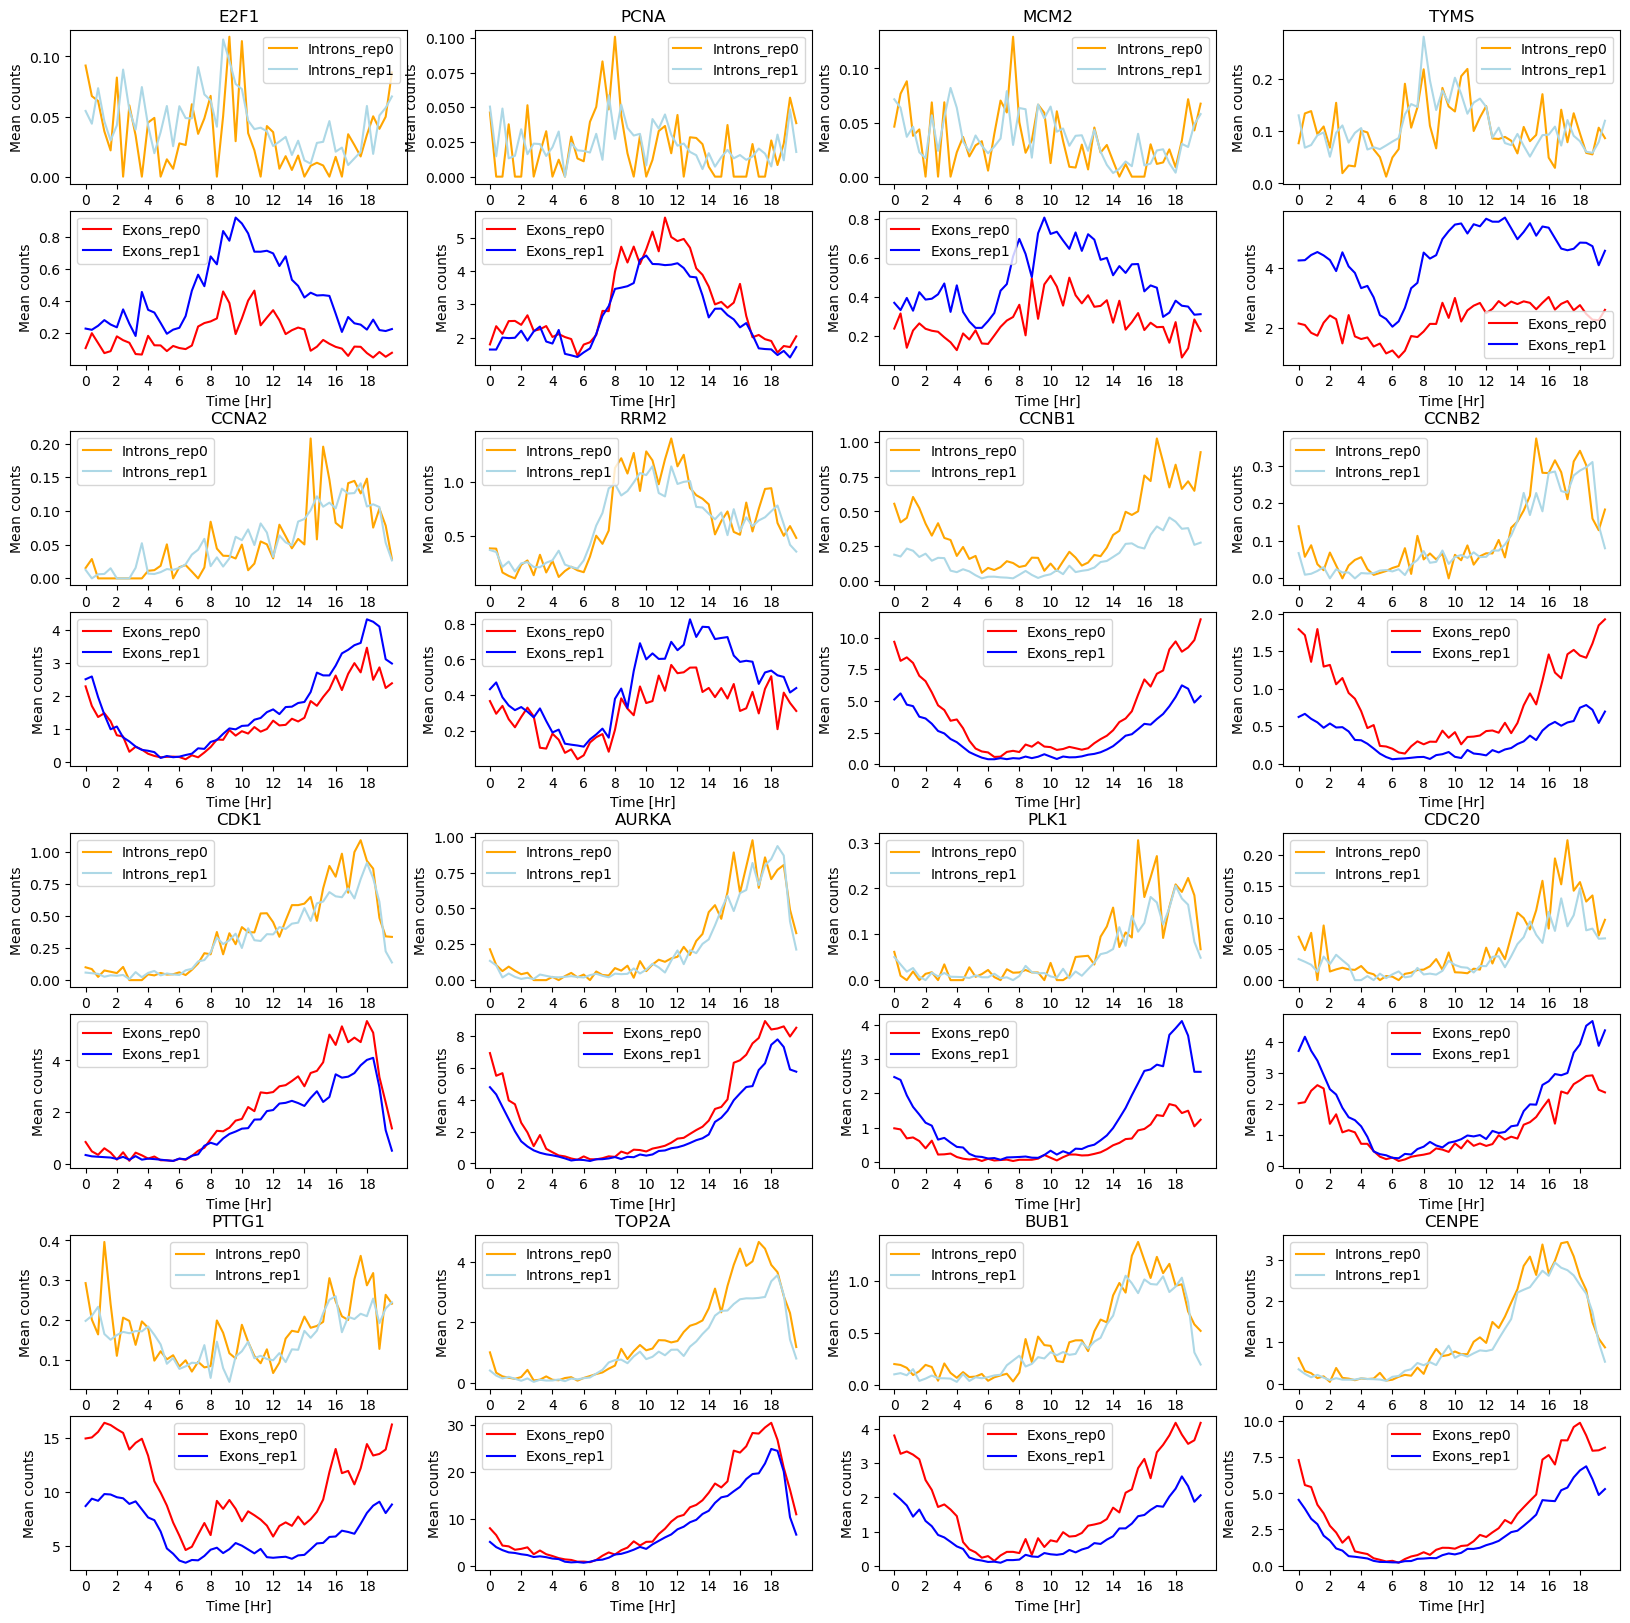

In [9]:
#List of genes covering the cell cycle
my_genes_list = [
    'E2F1', 'CCNE1', 'PCNA', 'MCM2', 'TYMS',       # G1/S
    'CCNA2', 'RRM2', 'FEN1',                       # S
    'CCNB1', 'CCNB2', 'CDK1', 'AURKA', 'PLK1',     # G2/M
    'CDC20', 'PTTG1', 'TOP2A', 'BUB1', 'CENPE'     # M et early G1
]

# verify if the genes are in the index 
valid_genes = [g for g in my_genes_list if g in dat.index]
print (f"{len(valid_genes)} Valid genes found in the dataset: {valid_genes}")

plot_gene_list(dat, valid_genes)

We have indeed a peak for each phase of the cell cycle.

Running PCA on exon data...


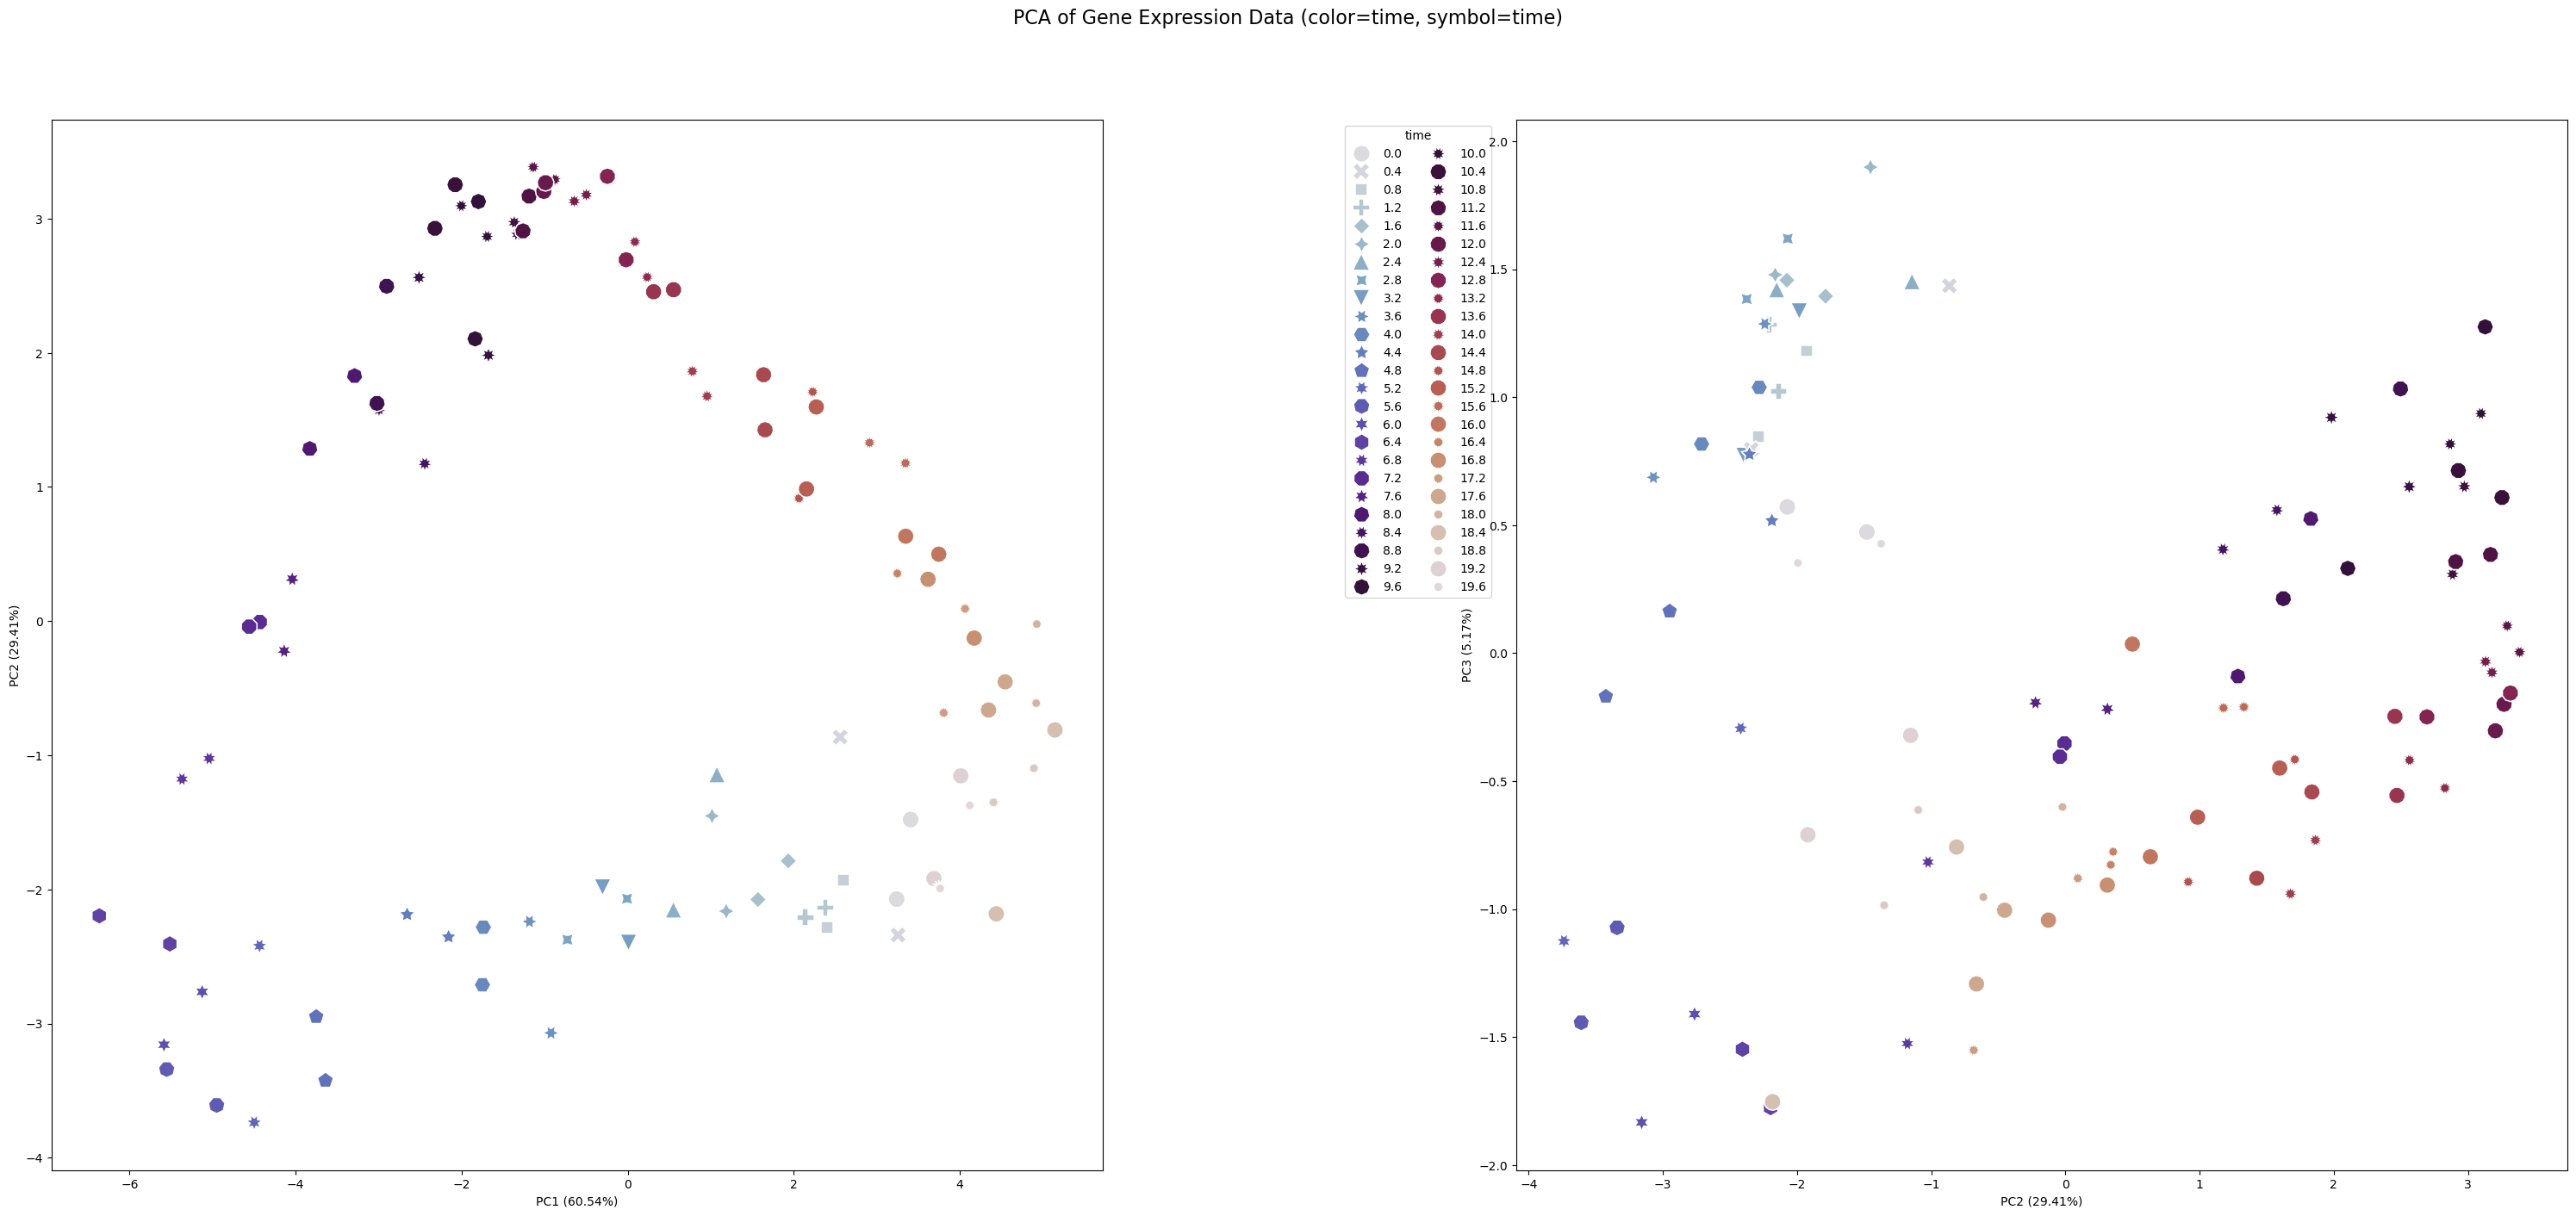

Running PCA on intron data...


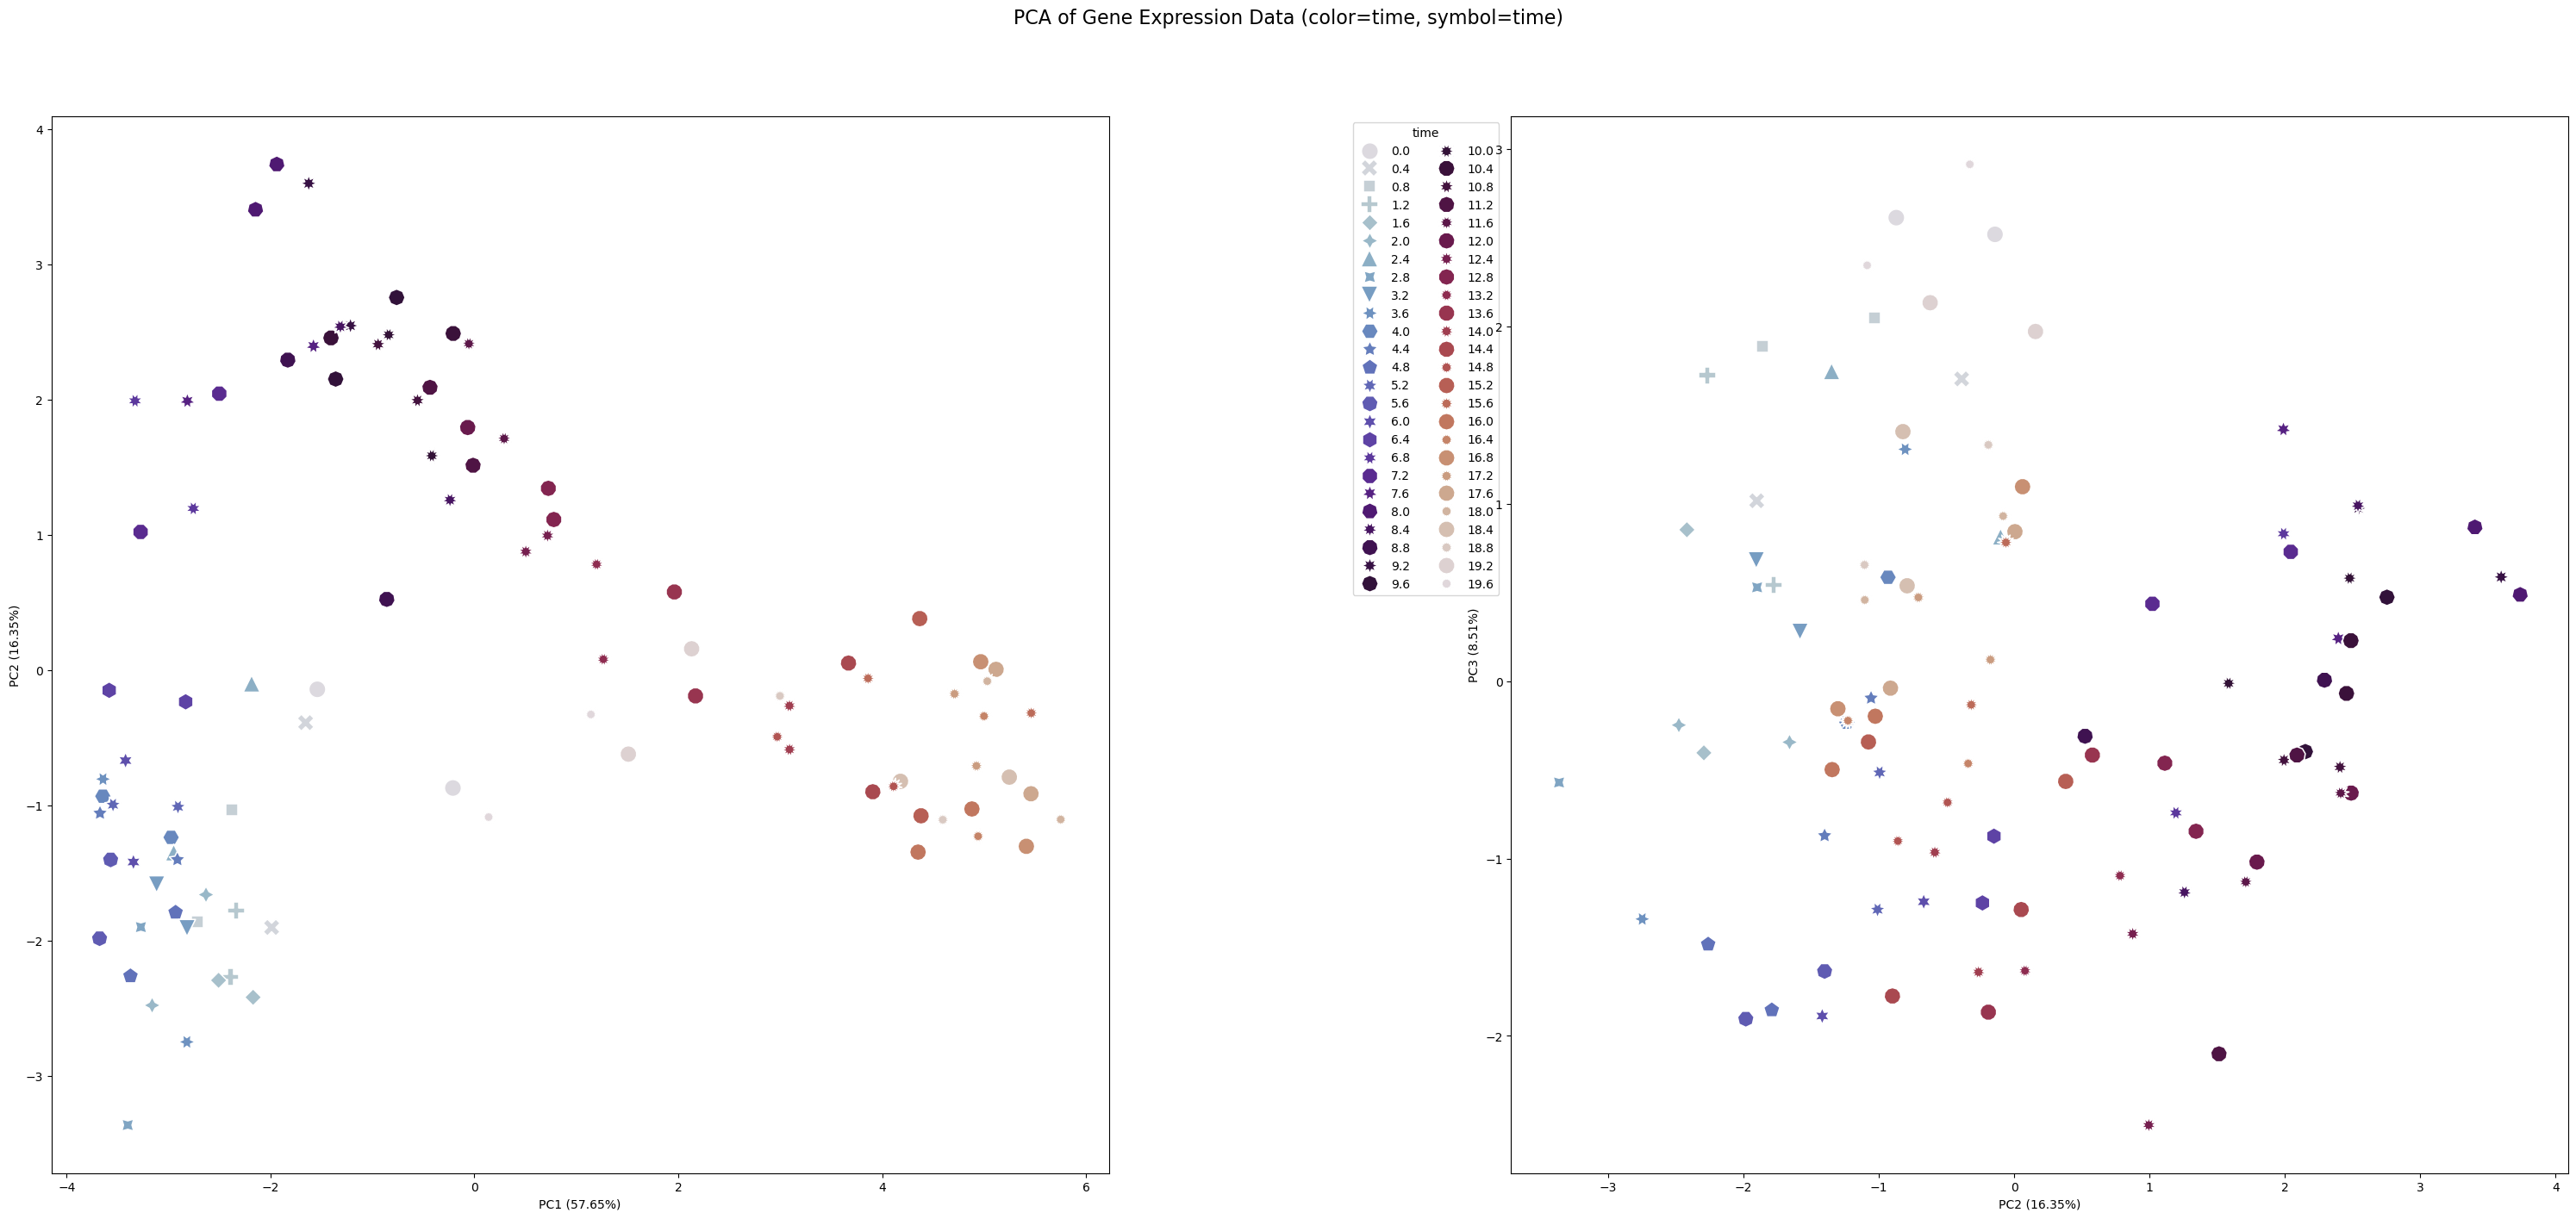

In [10]:
#run PCA:
# PCA on exon:   
print("Running PCA on exon data...")
df_pca_exon = run_PCA(dat_exon.loc[valid_genes], n_components=3, color_by='time')
plt.show()

# PCA on intron
print("Running PCA on intron data...")
df_pca_intron = run_PCA(dat_intron.loc[valid_genes], n_components=3, color_by='time')
plt.show()

2) The PCA reveals a circular trajectory and reconstructs the continuous cell cycle clock. This aspect confirms that cell cycle progression is the dominant driver of expression variance, though the intron trajectories appear more jagged compared to the smoother exon paths. This reflects the biological difference between bursty instantaneous transcription (introns) and the stable accumulation of mature mRNA (exons)

3) From the exon expression profiles, G1/S can be placed where the classic DNA-replication genes (E2F1, PCNA, TYMS) start to increase. This happens around **4–6 h**, and corresponds to the region on the PCA trajectory where the points move away from the “early G1” cluster (blue/ purple cluster) and begin the circular path.

    The G2/M transition is marked by the peak of mitotic regulators such as CCNB1/2, CDK1, AURKA, PLK1, CDC20, which all reach maximal exon expression later in the cycle, around **14–16 h**. It occurs after DNA replication is complete and the cell has prepared for division. On the PCA, these time points occupy the opposite side of the circle (red to white cluster), consistent with cells approaching and entering mitosis.


#### Assess gene expression periodicity genome-wide

In [11]:
# Apply the function to both intron and exon data.
offset=0.1
dat_intron_fit=dat_intron
dat_exon_fit=dat_exon
dat_intron_fit = np.log2(dat_intron_fit + offset)
dat_exon_fit = np.log2(dat_exon_fit + offset)

T = 20
time = dat_exon_fit.columns.get_level_values('time').str.replace('ZT','').astype(int).to_numpy()
time=time/(time.max()+1)
time=time*T

results_intron = fit_harmo(dat_intron_fit, time, T)
results_exon = fit_harmo(dat_exon_fit, time, T)



#### Define the genes of interest

In [12]:
# Get the genes with significant periodic gene expression in introns and exons

#thresholds
q_thresh = 0.05
amp_thresh_intron = 0.5
amp_thresh_exon = 0.25

# periodic genes 
# For Introns
genes_per_introns_mask = (results_intron['q_val'] < q_thresh) & (results_intron['amp'] > amp_thresh_intron)
genes_per_introns = results_intron[genes_per_introns_mask]

# For Exons
genes_per_exons_mask = (results_exon['q_val'] < q_thresh) & (results_exon['amp'] > amp_thresh_exon)
genes_per_exons = results_exon[genes_per_exons_mask]

print(f"periodic genes found in Introns: {len(genes_per_introns)}")
print(f"periodic genes found in Exons: {len(genes_per_exons)}")

periodic genes found in Introns: 1233
periodic genes found in Exons: 3016


#### Plot phase and amplitude distribution for the rhythmic genes

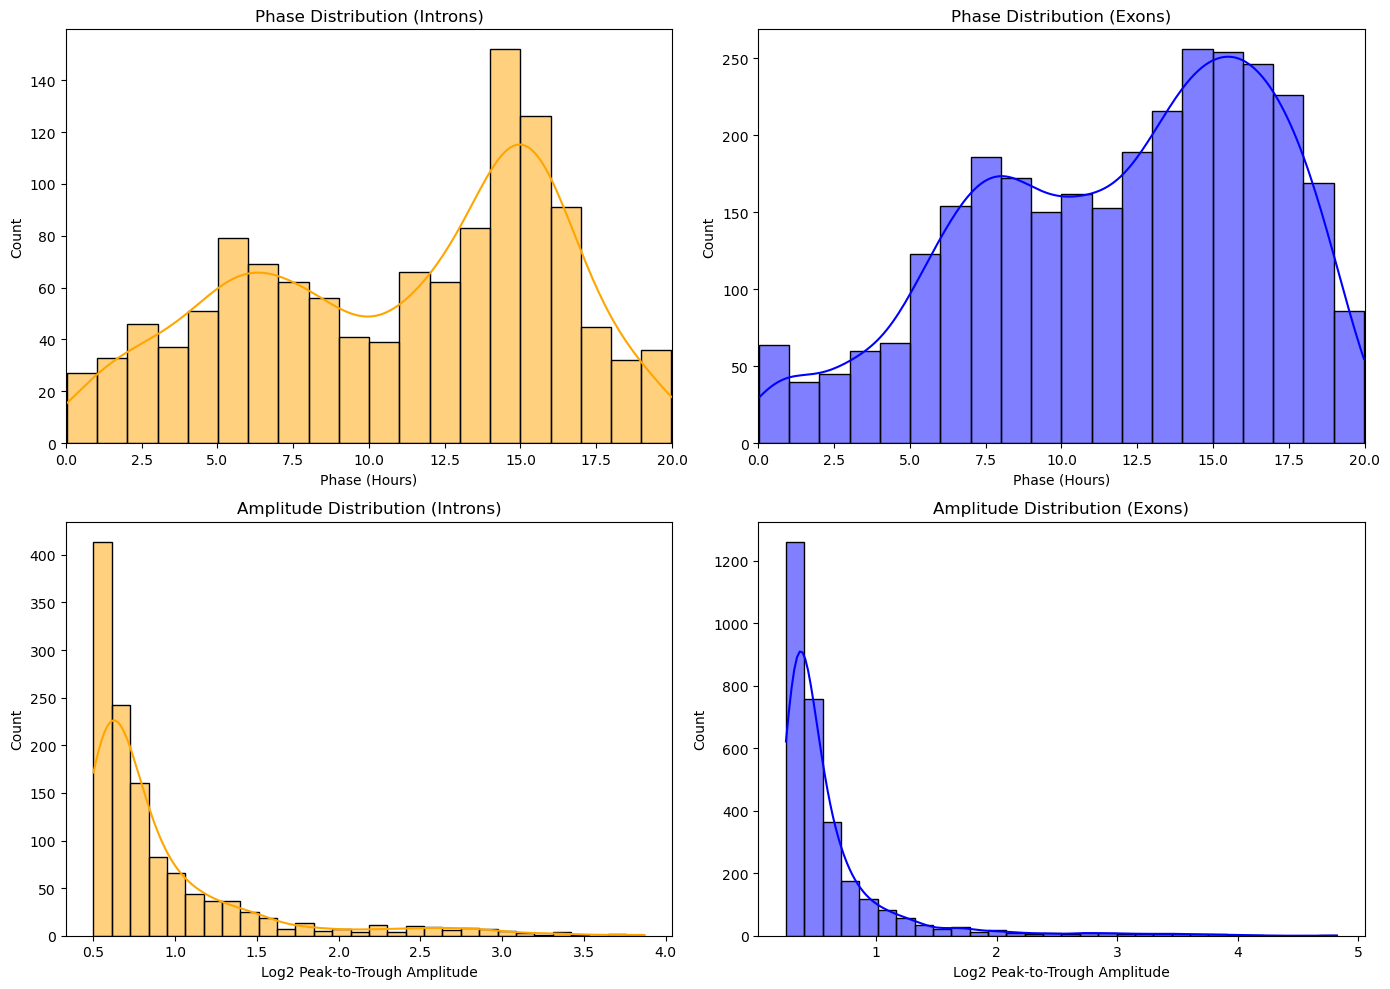

In [13]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Intron Phase
sns.histplot(genes_per_introns['phase'], bins=20, ax=axes[0, 0], color='orange', kde=True)
axes[0, 0].set_title('Phase Distribution (Introns)')
axes[0, 0].set_xlabel('Phase (Hours)')
axes[0, 0].set_xlim(0, 20)

# Exon Phase
sns.histplot(genes_per_exons['phase'], bins=20, ax=axes[0, 1], color='blue', kde=True)
axes[0, 1].set_title('Phase Distribution (Exons)')
axes[0, 1].set_xlabel('Phase (Hours)')
axes[0, 1].set_xlim(0, 20)

# Intron Amplitude
sns.histplot(genes_per_introns['amp'], bins=30, ax=axes[1, 0], color='orange', kde=True)
axes[1, 0].set_title('Amplitude Distribution (Introns)')
axes[1, 0].set_xlabel('Log2 Peak-to-Trough Amplitude')

# Exon Amplitude
sns.histplot(genes_per_exons['amp'], bins=30, ax=axes[1, 1], color='blue', kde=True)
axes[1, 1].set_title('Amplitude Distribution (Exons)')
axes[1, 1].set_xlabel('Log2 Peak-to-Trough Amplitude')

plt.tight_layout()
plt.show()

4) Yes, the genes don’t peak randomly. We have rhythmic genes cluster in two major waves, one peaking around ~5–8 h (S-phase) and another around ~14–16 h (G2/M). Introns show this most strongly (very sharp peaks), exons are smoother but follow the same timing (transcription vs. mature mRNA dynamics). Therefore, we recover a clean temporal program of cell-cycle transcription.




#### Investigate the types of genes that were selected as periodic

Total of genes within the list : 16
Recovered genes as periodic (16) : ['E2F1', 'PCNA', 'MCM2', 'TYMS', 'CCNA2', 'RRM2', 'CCNB1', 'CCNB2', 'CDK1', 'AURKA', 'PLK1', 'CDC20', 'PTTG1', 'TOP2A', 'BUB1', 'CENPE']
Missing genes (0)

Top 10 most rhythmic genes (by amplitude)
['HIST1H1B', 'AURKA', 'HIST1H4C', 'TOP2A', 'CDK1', 'CDCA8', 'CENPE', 'HJURP', 'ASPM', 'SGO2']


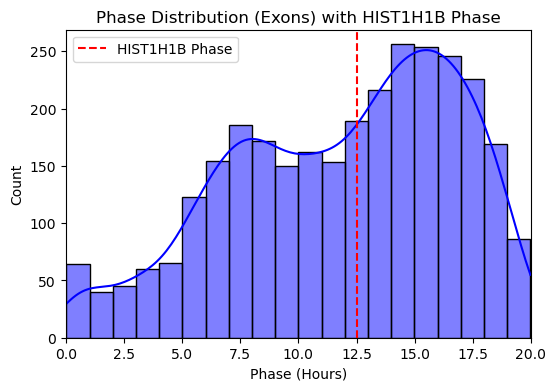

In [14]:
# we assure that 'valid_genes' is defined in question 1
if 'valid_genes' not in locals():
    my_genes_list = [
        'E2F1', 'CCNE1', 'PCNA', 'MCM2', 'TYMS',       # G1/S
        'CCNA2', 'RRM2', 'FEN1',                       # S
        'CCNB1', 'CCNB2', 'CDK1', 'AURKA', 'PLK1',     # G2/M
        'CDC20', 'PTTG1', 'TOP2A', 'BUB1', 'CENPE'     # M et early G1
    ]
    valid_genes = [g for g in my_genes_list if g in dat.index]

# we check which genes from your list are found as periodic in exons
recovered_genes = [gene for gene in valid_genes if gene in genes_per_exons.index]
missing_genes = [gene for gene in valid_genes if gene not in genes_per_exons.index]

print(f"Total of genes within the list : {len(valid_genes)}")
print(f"Recovered genes as periodic ({len(recovered_genes)}) : {recovered_genes}")
print(f"Missing genes ({len(missing_genes)})")

# Analysis of biological function types
print("\nTop 10 most rhythmic genes (by amplitude)")
print(genes_per_exons.sort_values('amp', ascending=False).head(10).index.tolist())

# exemple of phase histogram of the most rhythmic gene HIST1H1B:
best_gene="HIST1H1B"
best_gene_phase = genes_per_exons.loc[best_gene, 'phase']
plt.figure(figsize=(6, 4))
sns.histplot(genes_per_exons['phase'], bins=20, color='blue', kde=True)
plt.axvline(best_gene_phase, color='red', linestyle='--', label=f'{best_gene} Phase')
plt.title('Phase Distribution (Exons) with HIST1H1B Phase')
plt.xlabel('Phase (Hours)')
plt.xlim(0, 20)
plt.legend()
plt.show()


5) From the results, we see a big enrichment for DNA-replication genes (MCMs, RRM2, TYMS, PCNA), G1/S regulators like E2F1, and all the classic G2/M mitotic genes (CCNB1/2, CDK1, AURKA, PLK1, CDC20, CENPE, TOP2A, BUB1…).
    All the genes from the curated list in Q1 show up as periodic: literally 16 out of 16, so the harmonic regression is picking up the real biological signal we expected in Q1. \
    We also catch extra cell-cycle genes with very strong oscillations, like histones (HIST1H1B, HIST1H4C) and spindle/kinetochore factors (HJURP, ASPM, SGO2), which makes total sense because they peak sharply during S-phase and mitosis (histone production occurs during S-phase, peak when DNA replication requires a rapid doubling of nucleosome content). Therefore, we recover the expected cell-cycle program, and other regulators that corresponds with the temporal waves seen in the data.


### Question 2

1. Related to Exercise 1, study the relationship between the peak times (i.e., phase) of pre-mRNA and mRNA for genes that exhibit periodic behaviour at both the pre-mRNA and mRNA levels. Use appropriate cutoffs in your analysis to select a subset of genes that are periodic at both the pre-mRNA and mRNA levels. Aim to include several hundred genes for a robust analysis.  
   **Hint:** Show a scatter plot of mRNA vs. pre-mRNA peak times. Explain your findings.

2. Show representative profiles of genes with short or long delays between the pre-mRNA and mRNA peak times. Explain.

3. From the delay between the pre-mRNA and mRNA ($\delta t$ [hr]), infer the mRNA half-life ($\tau$ [hr]) using the formula derived in the course:  


   $$\tan\left(\frac{2\pi \cdot \delta t}{20}\right) = \frac{2\pi}{20}  \frac{ \tau}{\ln(2)}$$
 

   Plot the histogram of the inferred mRNA half-lives and a scatter plot of half life vs mRNA amplitudes ($log_2$ peak-to-trough). Explain your findings.

4. **(Bonus):** What can you infer about the splicing rate?  





#### Plot pre-mRNA, mRNA delay

Number of common periodic genes: 991


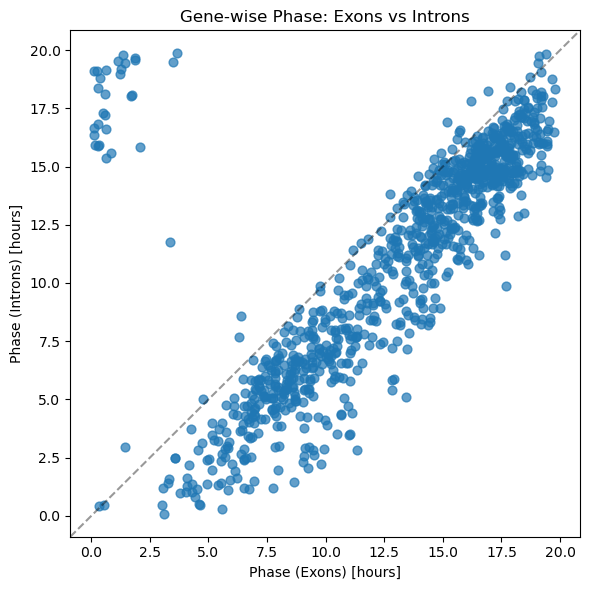

In [19]:
# plot phase exons vs phase introns

# keep only genes that are periodic in BOTH introns and exons
common_genes = genes_per_exons.index.intersection(genes_per_introns.index)
print(f"Number of common periodic genes: {len(common_genes)}")

# extract phases aligned by gene
phase_exons_common = genes_per_exons.loc[common_genes, "phase"]
phase_introns_common = genes_per_introns.loc[common_genes, "phase"]

plt.figure(figsize=(6, 6))
plt.scatter(
    phase_exons_common,
    phase_introns_common,
    s=40,
    alpha=0.7
)

plt.xlabel("Phase (Exons) [hours]")
plt.ylabel("Phase (Introns) [hours]")
plt.title("Gene-wise Phase: Exons vs Introns")

# diagonal reference line
lims = [
    min(plt.xlim()[0], plt.ylim()[0]),
    max(plt.xlim()[1], plt.ylim()[1])
]
plt.plot(lims, lims, 'k--', alpha=0.4)
plt.xlim(lims)
plt.ylim(lims)

plt.tight_layout()
plt.show()



1. Most points lie close to the diagonal meaning that genes are positively correlated and follow the same cell-cycle gene expression wave. However, most points are just below the diagonal meaning that pre-mRNA peaks earlier than mature mRNA. This makes biological sense as there is a delay due to splicing and slower degradation.

### Plot representative genes with short or long-delay

In [32]:
#Compute the delay between intron and exon
#Restrict to genes with phase difference < 5 hours and with exon later than intron

# First build a merged table
merged = genes_per_exons[['phase']].rename(columns={'phase': 'phase_exon'}).merge(
    genes_per_introns[['phase']].rename(columns={'phase': 'phase_intron'}),
    left_index=True, right_index=True
)

# Compute delay
merged['delay'] = merged['phase_exon'] - merged['phase_intron']

# Apply restriction: exon later than intron & delay < 5 hours & delay > 0
selected = merged[(merged['delay'] > 0) & (merged['delay'] < 5)]

print("Total genes with delay < 5h and exon > intron:", selected.shape[0])

# Genes with very short delay (< 1 hour)
short_delay = selected[selected['delay'] < 1].sort_values('delay')
print("\nGenes with short delay (<1h):")
print(short_delay.head())

# Genes with long delay (between 3 and 5 hours)
long_delay = selected[(selected['delay'] >= 3) & (selected['delay'] <= 5)].sort_values('delay')
print("\nGenes with long delay (3–5h):")
print(long_delay.tail())



Total genes with delay < 5h and exon > intron: 862

Genes with short delay (<1h):
          phase_exon  phase_intron     delay
MTFR2      14.224026     14.169722  0.054304
TAF1D       0.530015      0.462644  0.067372
GGNBP2     14.768099     14.672400  0.095699
C21ORF58   13.786393     13.689429  0.096965
STARD13     9.764987      9.666976  0.098011

Genes with long delay (3–5h):
       phase_exon  phase_intron     delay
SCFD1    9.192131      4.253992  4.938138
FKBP5   13.152264      8.208313  4.943951
POLE2   12.424402      7.465201  4.959201
MGAT5   11.542784      6.576716  4.966067
SYNE2   15.992401     10.998759  4.993642


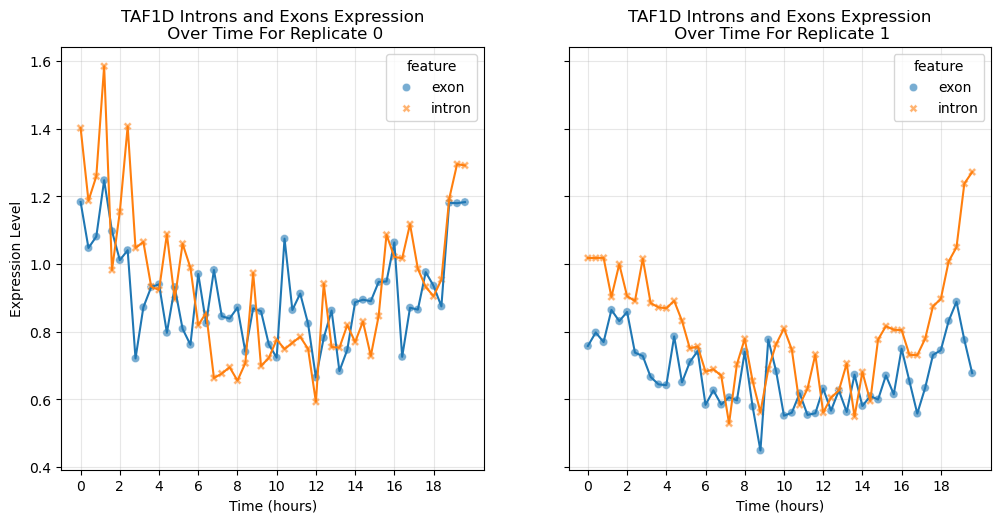

In [23]:
# Plot a short-delay gene
plot_gene_expression(dat_melted, short_delay.index[1])


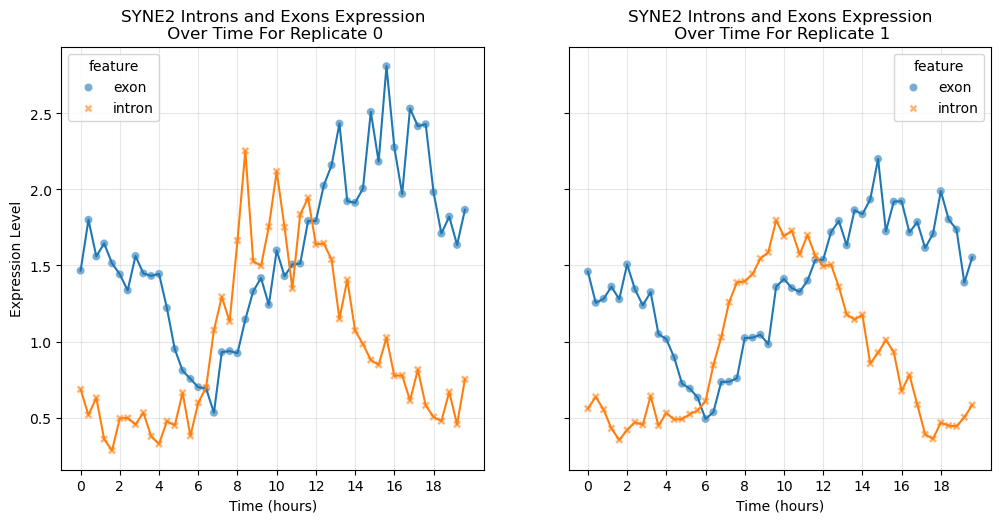

In [31]:
# Plot a long-delay gene

plot_gene_expression(dat_melted, long_delay.index[-1])

2. Here are two example genes with different delays. For TAF1D, the delay is very short (0.067) and the two curves nearly overlap. However, for SYNE2, the introns peak 4.99 hours earlier and the delay is clearly noticeable on the plot.

### Compute half-life from the delay between intron and exon


In [36]:
# Compute half-life using the formula


df = selected.copy()


period = 20

df['half_life'] = np.tan(np.pi * df['delay'] / (period/2)) * ((period/2) * np.log(2) / np.pi)

print(df[['delay', 'half_life']].head())

print(len(df))


               delay  half_life
AAK1        2.003003   1.606194
ABCB10      3.624806   4.785189
AC018464.1  1.977787   1.579606
AC025171.1  1.539633   1.159021
AC048341.1  0.499554   0.349135
862


#### Compare Half lives and mRNA amplitudes

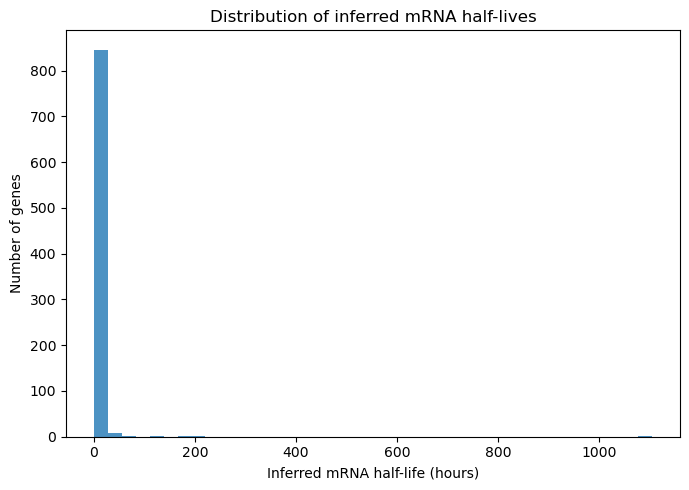

In [35]:
# Histogram of inferred mRNA half-lives

plt.figure(figsize=(7, 5))
plt.hist(df['half_life'], bins=40, alpha=0.8)
plt.xlabel("Inferred mRNA half-life (hours)")
plt.ylabel("Number of genes")
plt.title("Distribution of inferred mRNA half-lives")
plt.tight_layout()
plt.show()

In [38]:
genes_per_exons.columns


Index(['mu', 'amp', 'phase', 'p_val', 'q_val'], dtype='object')

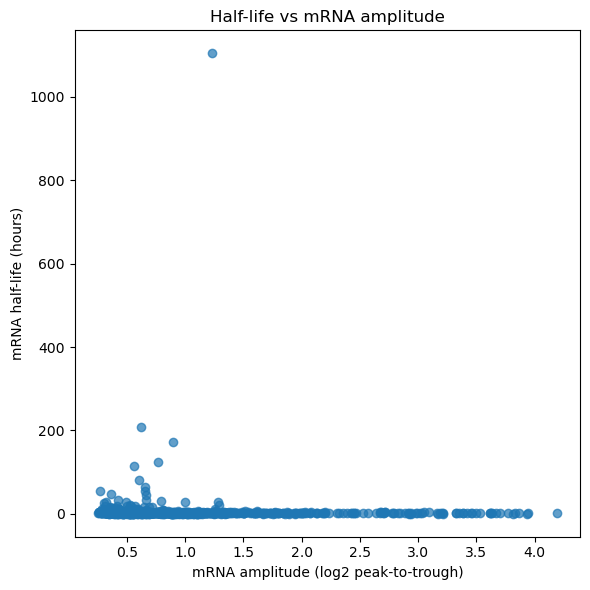

In [41]:
# Scatter plot: half-life vs mRNA amplitude (log2 peak-to-trough)

# extract amplitude from the exons fit table

amp = genes_per_exons['amp'] #already in log2

# align with df
amp_aligned = amp.loc[df.index]

plt.figure(figsize=(6, 6))
plt.scatter(amp_aligned, df['half_life'], alpha=0.7)
plt.xlabel("mRNA amplitude (log2 peak-to-trough)")
plt.ylabel("mRNA half-life (hours)")
plt.title("Half-life vs mRNA amplitude")
plt.tight_layout()
plt.show()

3. The histogram shows a strong peak at short values, consistent with the previous biological findings. mRNA must turn over rapidly to generate the oscillations. Outliers arise when the delay approaches 5h, the model diverges. They simply represent mathematical instability. 
In the scatter plot, there is no strong positive correlation. Genes with larger amplitudes generally have short half-lives and conversely, long half-life genes have low amplitude.

4. The exon–intron peak delay is small compared to the 20-hour cell-cycle period and is generally shorter than the inferred mRNA half-lives. This indicates that splicing is fast relative to both transcriptional cycling and mRNA degradation.